# Suavizadores de kernel unidimensionales

Como vimos en la  clase, el suavizado con kernel en regresión es una técnica no paramétrica que se utiliza para estimar la función de regresión subyacente de un conjunto de datos

**kNN**: Modelo basado en instancias que simplemente compara la proporción de muestras de cada clase dentro de un vecindario. Es necesario memorizar todo el conjunto de datos de entrenamiento. Es por eso que a veces decimos que NN es un método basado en instancias.

En este contexto, el procedimiento que vamos a implementar es:

1. **Elegir un Kernel:** Función que asigna pesos a los puntos en función de su distancia al punto de consulta.
Los kernels comunes incluyen el kernel gaussiano,  el kerlnel Tricubo, el kernel Epanechnikov y el kernel rectangular. El kernel determina cómo se ponderan los datos cercanos en comparación con los datos más lejanos.

Si quieres conocer los diferentes kernel , puedes tomar como referencia el libro Hastie, T., Tibshirani, R., & Friedman, J. (2009). The Elements of Statistical Learning: Data Mining, Inference, and Prediction (2nd ed.). Springer. , o si lo proefieres usar la wiki  https://en.wikipedia.org/wiki/Kernel_(statistics)


2. **Elegir un ancho de banda (h):**
El ancho de banda es un parámetro crucial en el suavizado con kernel. Controla el grado de suavizado. Un ancho de banda pequeño dará como resultado una función de regresión muy **"ondulada"**, mientras que un ancho de banda grande producirá una función **más suavizada**. La elección del ancho de banda adecuado es crucial y suele hacerse mediante validación cruzada.

3. **Calculamos la Estimación:** Para un punto de consulta $x$, la estimación de regresión $\hat{f}(x)$ se calcula como:

$$
\hat{f}(x) = \frac{\sum_{i=1}^{n} K\left(\frac{x - x_i}{h}\right) y_i}{\sum_{i=1}^{n} K\left(\frac{x - x_i}{h}\right)}
$$

donde:

- $ n $ es el número de puntos de datos.
- $ K $ es la función kernel.
- $ x_i $ y $ y_i $ son los puntos de datos.
- $ h $ es el ancho de banda.

Básicamente, para cada punto de consulta $ x $, se ponderan todos los puntos de datos $y_i$ por la cantidad $ K\left(\frac{x - x_i}{h}\right) $. Los puntos más cercanos a $ x $ tendrán pesos más altos que los puntos más lejanos, dependiendo de la elección del kernel y del ancho de banda.

4. **Función de regresón estimada** Se estima por cada punto  de interes y se genera la función de rgresión

## Procedimiento  selección de kernel

A lo largo de nuestras clases y sesion de laboratorio, hemos abordado varios funciones kernel. A continuación, resumiremos algunas de las funciones de kernel que hemos utilizado, con el objetivo de utilizarlas para futuras estimaciones:

1. **Kernel Gaussiano**:

$$
K(u) = e^{-\frac{1}{2} u^2}
$$


2. **Kernel Tricubo**:
$$
K(u) =
\begin{cases}
(1 - |u|^3)^3 & \text{si } |u| \leq 1 \\
0 & \text{si } |u| > 1
\end{cases}
$$


3. **Kernel Epanechnikov**:

$$
K(u) =
\begin{cases}
\frac{3}{4}(1 - u^2) & \text{si } |u| \leq 1 \\
0 & \text{si } |u| > 1
\end{cases}
$$

4. **Kernel Rectangular**:
$$
K(u) =
\begin{cases}
\frac{1}{2} & \text{si } |u| \leq 1 \\
0 & \text{si } |u| > 1
\end{cases}
$$

A continuación, visualizaremos estas funciones para facilitar su comprensión.

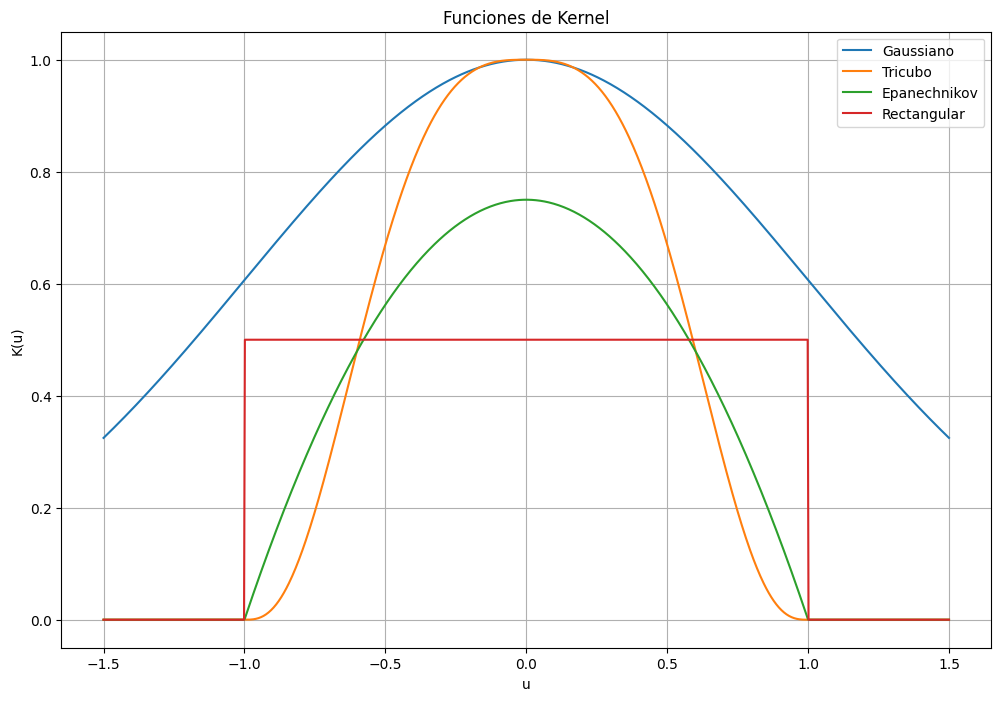

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definición de las funciones de kernel
def gaussian_kernel(u):
    return np.exp(-0.5 * u**2)

def tricube_kernel(u):
    condition = np.abs(u) <= 1
    return np.where(condition, (1 - np.abs(u)**3)**3, 0)

def epanechnikov_kernel(u):
    condition = np.abs(u) <= 1
    return np.where(condition, 3/4 * (1 - u**2), 0)

def rectangular_kernel(u):
    condition = np.abs(u) <= 1
    return np.where(condition, 0.5, 0)

# Visualización
u = np.linspace(-1.5, 1.5, 1000)

plt.figure(figsize=(12, 8))
plt.plot(u, gaussian_kernel(u), label='Gaussiano')
plt.plot(u, tricube_kernel(u), label='Tricubo')
plt.plot(u, epanechnikov_kernel(u), label='Epanechnikov')
plt.plot(u, rectangular_kernel(u), label='Rectangular')
plt.legend()
plt.title('Funciones de Kernel')
plt.xlabel('u')
plt.ylabel('K(u)')
plt.grid(True)
plt.show()


## Procedimento  Estimación del  punto de interes

Como lo vimos en la clase anterio vamos a calcular el promedio de los vecinos  del punto de interes, para ello:


1. Se calcula la distancia al cuadrado entre el punto de consulta (point) y todos los puntos en data_x.

2. Se ordena estas distancias al cuadrado en orden ascendente y selecciona los índices de los primeros k puntos más cercanos.

3. Finalmente, se toma el promedio de los valores y asociados con estos k vecinos más cercanos.

La función tiene en cuenta la distancia para determinar cuáles son los
k vecinos más cercanos (ventana rectangular).
Sin embargo, una vez que identifica a estos vecinos, simplemente toma el promedio de sus valores asociados sin ponderarlos de ninguna manera.
Es decir, cada vecino tiene el mismo peso en el promedio final, independientemente de su distancia al punto de consulta.




In [ ]:
# Creamos una funcion para K-nearest neighbors basica

def knn_basic(k: int, point:float,data_x:np.ndarray,data_y:np.ndarray) -> float:
    idx_sorted = np.argsort((data_x-point)*(data_x-point))[:k]
    return data_y[idx_sorted].mean()


Para fines académicos, trabajaremos con un conjunto de datos ficticio. A continuación, aplicaremos el método knn_basic para obtener insights sobre este conjunto.


<Figure size 1000x500 with 0 Axes>

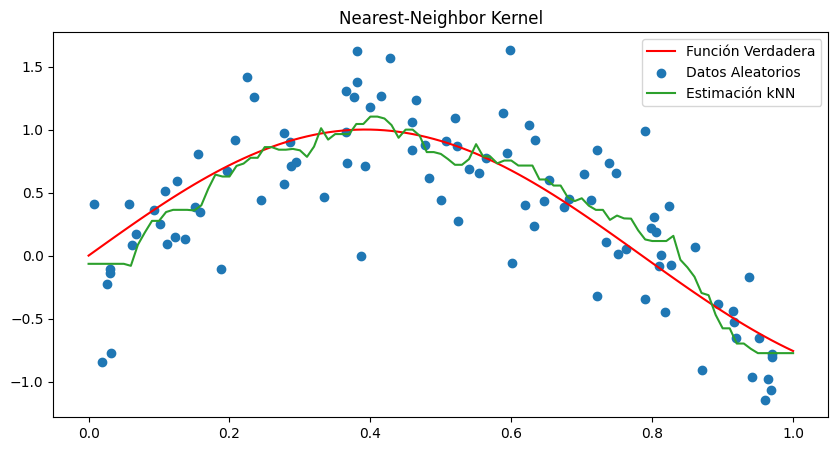

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 5))

# Creamos un espacio lineal
xgrid = np.linspace(0, 1, 101)
y_true = np.sin(4*xgrid)

# Ahora generamos datos aleatorios que intentaremos ajustar
size_sample = 100
x_sample = np.random.uniform(size=size_sample)
y_sample = np.sin(4*x_sample) + np.random.randn(size_sample) / 3


k = 10  # Número de vecinos se debe modificar de 1 a 100
y_knn = np.array([knn_basic(k, x, x_sample, y_sample) for x in xgrid])

plt.figure(figsize=(10, 5))
plt.plot(xgrid, y_true, color='red', label='Función Verdadera')  # Línea roja
plt.scatter(x_sample, y_sample, label='Datos Aleatorios')  # Puntos aleatorios
plt.plot(xgrid, y_knn, color='C2', label='Estimación kNN')  # Estimación knn_basic
plt.title('Nearest-Neighbor Kernel')
plt.legend()
plt.show()




## **Conclusiones iniciales**

Al modificar el valor de $k$ en el algoritmo kNN, se observan cambios significativos en la estimación:

1. **Valores pequeños de $k$**:
Conducen a estimaciones más flexibles y adaptativas a los datos.
El modelo será más sensible a las fluctuaciones y al ruido en los datos, lo que puede resultar en un sobreajuste.
La estimación seguirá más de cerca a cada punto individual, lo que podría capturar patrones que son simplemente ruido y no representativos de la estructura subyacente de los datos.

2. **Valores grandes de $k$:**
Generan estimaciones más suaves y generalizadas. Se reduce la variabilidad y la sensibilidad a las fluctuaciones en los datos.
Si $k$ es demasiado grande, el modelo puede ser demasiado simplista, lo que puede resultar en un subajuste, es decir, no capturar la verdadera estructura o patrón de los datos.



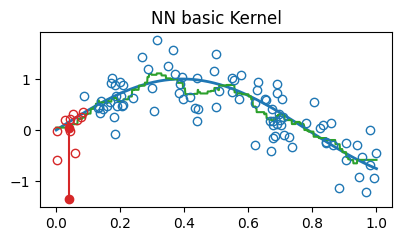

In [ ]:
idx_x0 = 40
x0 = xgrid[idx_x0]  # 0.1
idx_x0_neighbors = np.argsort((x_sample-x0)*(x_sample-x0))

# ventana
k = 10
y_knn_basic = np.array([knn_basic(k, x, x_sample, y_sample) for x in xgrid])

fig61 = plt.figure(61, figsize=(10, 5))
ax1 = fig61.add_subplot(2, 2, 1)
ax1.plot(xgrid, y_true, color='C0', linewidth=2)
ax1.plot(xgrid, y_knn_basic, color='C2')

ax1.plot(x_sample[idx_x0_neighbors[:k]], y_sample[idx_x0_neighbors[:k]],
         'o', color='C3', mfc='none')
ax1.plot(x_sample[idx_x0_neighbors[k:]], y_sample[idx_x0_neighbors[k:]],
         'o', color='C0', mfc='none')
ax1.plot((x0, x0), (ax1.get_ylim()[0], y_knn_basic[idx_x0]), 'o-', color='C3')

ax1.set_title('NN basic Kernel')
plt.show()

## **implementando diferentes kernel**

Para facilitar la implementación, es recomendable crear funciones que, dada una ventana y un kernel específico, nos devuelvan el promedio asociado a un punto determinado.

para ello los parametros son:

- **lmbda**: Valor que representa el ancho de banda o ventana.
- **point**: Valor que representa el punto de consulta.
- **data_x**: Un array que contiene los puntos de datos.
- **data_y**: Un array que contiene los valores asociados a data_x.


In [ ]:
# Creamos una funcion para Epanechnikov
def knn_Epanechnikov(lmbda:float, point:float,
                 data_x:np.ndarray, data_y:np.ndarray) -> float:
    # Calculo de la distancia Normalizada
    t = np.absolute(data_x-point)/lmbda
    #aplicacion del kernel Epanechnikov
    k = np.where(t <= 1, .75*(1-t), 0)
    # se retorna el promedio ponderado
    return (k @ data_y).sum()/k.sum()

# Función de suavizado con kernel Gaussiano
def Knn_Gaussian(lmbda: float, point: float, data_x: np.ndarray, data_y: np.ndarray) -> float:
    t = np.absolute(data_x - point) / lmbda
    k = (1 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * t**2)
    return (k @ data_y) / k.sum()

# Función de suavizado con kernel Tricúbico
def knn_Tricubic(lmbda: float, point: float, data_x: np.ndarray, data_y: np.ndarray) -> float:
    t = np.absolute(data_x - point) / lmbda
    k = np.where(t <= 1, (1 - t**3)**3, 0)
    return (k @ data_y) / k.sum()

Ahora bien, con las funciones podemos:

**Definición de lmbda**: Se establece un valor para lmbda, que representa el ancho de banda para el suavizado. Un valor más pequeño de lmbda significa que cada punto en la estimación se ve afectado por un menor número de puntos cercanos, lo que resulta en una curva más ondulada. Por otro lado, un valor más grande implica una curva más suave.

**Cálculo de las Estimaciones**: Se calculan las estimaciones de regresión usando tres diferentes kernels para los puntos en xgrid y acorde a las funciones anteriormente desarrolladas.
Para cada punto en xgrid, se ponderan los puntos de datos y_sample usando los diferentes kernels y se calcula una estimación.

**Visualización**: Se crean tres subgráficos, uno para cada kernel.
En cada gráfico, se muestra la función verdadera (línea azul).
La estimación del kernel respectivo se muestra con una línea de color verde
Los puntos de datos se muestran como círculos. Los puntos que están dentro del ancho de banda lmbda alrededor del punto de consulta x0 se destacan en un color rojo.

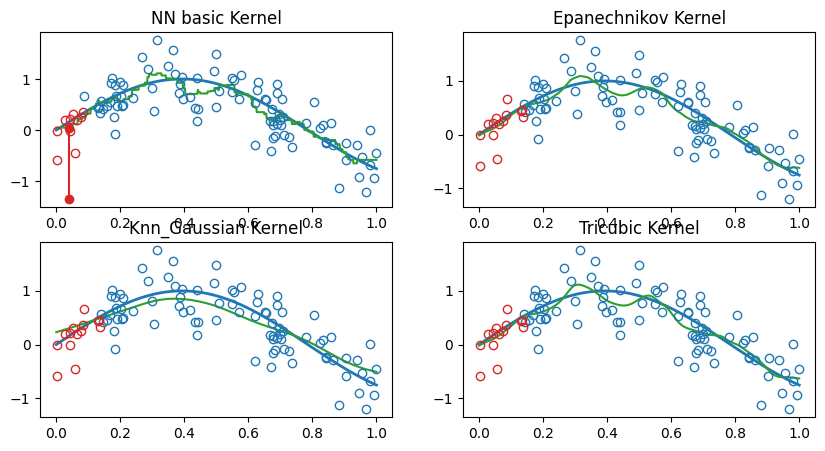

In [ ]:
lmbda = .1

y_knn_weighted_E = np.array([knn_Epanechnikov(lmbda, x, x_sample, y_sample)
                              for x in xgrid])

y_knn_weighted_G = np.array([Knn_Gaussian(lmbda, x, x_sample, y_sample)
                             for x in xgrid])
y_knn_weighted_T = np.array([knn_Tricubic(lmbda, x, x_sample, y_sample)
                              for x in xgrid])


mask_neighbor = np.absolute(x_sample-x0)/lmbda <= 1

ax2 = fig61.add_subplot(2, 2, 2)
ax2.plot(xgrid, y_true, color='C0', linewidth=2)
ax2.plot(xgrid, y_knn_weighted_E, color='C2')
ax2.plot(x_sample[~mask_neighbor], y_sample[~mask_neighbor], 'o', color='C0', mfc='none')
ax2.plot(x_sample[mask_neighbor], y_sample[mask_neighbor],   'o', color='C3', mfc='none')
ax2.set_title('Epanechnikov Kernel')

ax3 = fig61.add_subplot(2, 2, 3)
ax3.plot(xgrid, y_true, color='C0', linewidth=2)
ax3.plot(xgrid, y_knn_weighted_G, color='C2')
ax3.plot(x_sample[~mask_neighbor], y_sample[~mask_neighbor], 'o', color='C0', mfc='none')
ax3.plot(x_sample[mask_neighbor], y_sample[mask_neighbor],   'o', color='C3', mfc='none')
ax3.set_title('Knn_Gaussian Kernel')

ax4 = fig61.add_subplot(2, 2, 4)
ax4.plot(xgrid, y_true, color='C0', linewidth=2)
ax4.plot(xgrid, y_knn_weighted_T, color='C2')
ax4.plot(x_sample[~mask_neighbor], y_sample[~mask_neighbor], 'o', color='C0', mfc='none')
ax4.plot(x_sample[mask_neighbor], y_sample[mask_neighbor],   'o', color='C3', mfc='none')
ax4.set_title('Tricubic Kernel')


fig61


La función ajustada ahora  depede de  el kernel y la ponderación
recuerda: A medida que movemos el objetivo de izquierda a derecha, los puntos entran en la vecindad inicialmente con peso cero y luego su contribución aumenta lentamente segun el kernel

Tenga en cuenta que usamos un tamaño de ventana métrica $\lambda$ para el ajuste del núcleo, que no cambia a medida que movemos el punto objetivo $x_0$, mientras que el tamaño de la ventana de suavizado  k en la primera parte NN se adapta a la densidad local del $x_i$.


\begin{equation}
K_\lambda(x_0, x) = K \left( \frac{|x-x_0|}{h_\lambda(x_0)} \right),
\end{equation}

donde $h_\lambda(x_0)$ es una función de ancho (indexada por $\lambda$) que determina el ancho del vecindario en $x_0$.

* los nuevos kernel usa una constante $h_\lambda(x_0)=\lambda$.
* y en el KNN basic $\lambda$ con el tamaño del vecindario $k$,

### **Conclusiones**

* Se debe determinar el parámetro de suavizado $\lambda$, que determina el ancho de la vecindad local.
  * $\lambda$ grande implica una varianza más baja -- promedios sobre más observaciones,
  * pero mayor sesgo: esencialmente asumimos que la verdadera función es constante dentro de la ventana.

* Los anchos de ventana métrica (constante $h_\lambda(x)$) tienden a mantener constante el sesgo de la estimación, pero la varianza es inversamente proporcional a la densidad local.
  El ancho de la ventana del vecino más cercano exhibe el comportamiento opuesto; la varianza permanece constante y el sesgo absoluto varía inversamente con la densidad local.

* Surgen problemas con los vecinos más cercanos cuando hay empates en el $x$. Con la mayoría de las técnicas de suavizado, uno puede simplemente reducir el conjunto de datos promediando $y_i$ en valores empatados de $X$, y complementando estas nuevas observaciones en los valores únicos de $x_i$ con un peso adicional $w_i$ (que multiplica el peso kernel).

* Esto deja un problema más general para tratar: Pesos de observación $w_i$.
  Operacionalmente, simplemente los multiplicamos por los pesos del núcleo antes de calcular el promedio ponderado. Con los vecindarios más cercanos, ahora es natural insistir en vecindarios con un contenido de peso total $k$ (relativo a $\sum w_i$).
  En caso de desbordamiento (la última observación necesaria en una vecindad tiene un peso $w_j$, lo que hace que la suma de los pesos exceda el presupuesto $k$), entonces se pueden usar partes fraccionarias.

* Surgen problemas de límites. Los vecindarios métricos tienden a contener menos puntos en los límites, mientras que los vecindarios más cercanos se vuelven más anchos.



# **Ejercicio: Predicción de Precios de Casas con Regresión k-Vecinos Más Cercanos**

En este ejercicio, trabajaremos con el conjunto de datos de las viviendas en la ciudad de Boston. Nuestro objetivo es predecir los precios de las casas utilizando regresión con k-vecinos más cercanos.

Pasos a seguir:

1. **División de Datos**:

Divide el conjunto de datos en grupos de entrenamiento, validación y prueba.

2. **Entrenamiento y Validación**:

Utiliza el conjunto de entrenamiento para entrenar un modelo kNN con kernel.
Evalúa diferentes valores de $K$ utilizando el conjunto de validación para determinar su rendimiento.

3. **Optimización**:

Basado en los resultados de validación, elige el mejor valor para $k$ o
$λ$ que ofrezca el menor error.

**Herramientas Sugeridas**:
Puedes aprovechar las funciones que hemos discutido anteriormente. Alternativamente, considera usar *KernelRidge* o *KNeighborsRegressor* de la biblioteca scikit-learn.

Siempre ten presente que el objetivo principal es comprender el proceso y no solo obtener un modelo con buen rendimiento. El entendimiento profundo te permitirá aplicar estos conceptos de manera efectiva en diferentes situaciones.

# Estimación de la Densidad de Probabilidad  kernel

La Estimación de la Densidad de Probabilidad (EDP), una técnica poderosa y flexible que busca estimar la función de densidad de probabilidad subyacente de una variable aleatoria. En lugar de contar directamente las ocurrencias, como en un histograma, la EDP utiliza técnicas de suavizado para proporcionar una representación continua de la distribución.

Uno de los métodos más populares para la EDP es la Estimación de la Densidad con Kernel (KDE, por sus siglas en inglés). La KDE es una técnica no paramétrica que estima la densidad de probabilidad basándose en una función de kernel y un ancho de banda asociado. El resultado es una representación suavizada que puede revelar patrones ocultos y estructuras en los datos que otros métodos podrían pasar por alto.

 La elección del kernel y su tamaño, conocido como "ancho de banda", determina cómo se suavizan los datos y cómo se representa la distribución subyacente. Hay varios tipos de kernels, como gaussiano, epánecnikov, rectangular, entre otros, y cada uno tiene sus propias características y aplicaciones.

# The Iris dataset
El conjunto de datos de la flor Iris es un conjunto clásico utilizado para identificar tres especies de flores basándose en características que describen sus sépalos y pétalos. Primero, carguemos el conjunto de datos e imprimamos su descripción.

In [1]:
import numpy as np
from sklearn import datasets

iris = datasets.load_iris()

print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

Como se lee en la descripción, el conjunto de datos Iris consta de 150 muestras descritas por 5 atributos. Cuatro de ellos serán utilizados como predictores (las características de las flores) y el quinto se utilizará como una etiqueta discreta.

Los predictores son:

   - Longitud del sépalo.
   - Ancho del sépalo.
   - Longitud del pétalo.
   - Ancho del pétalo.

La etiqueta puede tomar tres valores diferentes, es decir, hay tres clases en el conjunto de datos Iris, que son:

   - Setosa.
   - Versicolor.
   - Virginica.

Cada clase corresponde a una especie de flor diferente. Por lo tanto, el conjunto de datos Iris se puede utilizar para construir modelos de aprendizaje automático que identifiquen una de estas especies de flores observando las 4 características que describen sus pétalos y sépalos.

# Preguntas

  Calcule y visualice la Estimación de la Densidad con Kernel (KDE) para la "longitud del pétalo" de cada una de las tres especies.
  
  Basándose en las KDEs obtenidas, ¿cuál especie tiende a tener pétalos más largos y cuál tiende a tenerlos más cortos?
  

puedeses implementar  


1. Elegir un kernel: Hay varios kernels disponibles, como el gaussiano, el epánecnikov, el rectangular, entre otros. Cada uno tiene una forma y propiedades específicas.

2. Seleccionar un ancho de banda (h): El ancho de banda determina cuánto se suaviza la estimación. Un hh pequeño producirá una estimación más rugosa, mientras que un hh grande la suavizará demasiado. Puedes jugar con diferentes valores para ver su impacto.

3. Calcular la KDE para un punto xx: Para cada punto xx donde desees evaluar la KDE, utiliza la siguiente fórmula:

$$
\hat{f}(x) = \frac{1}{nh} \sum_{i=1}^{n} K\left( \frac{x - X_i}{h} \right)
$$

Donde:

$n$ es el número de puntos de datos.

$Xi$​ son los puntos de datos.

$K$ es la función del kernel.

$h$ es el ancho de banda.
